In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df['Species'] = df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
df = df.drop(['Id'],axis=1)

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

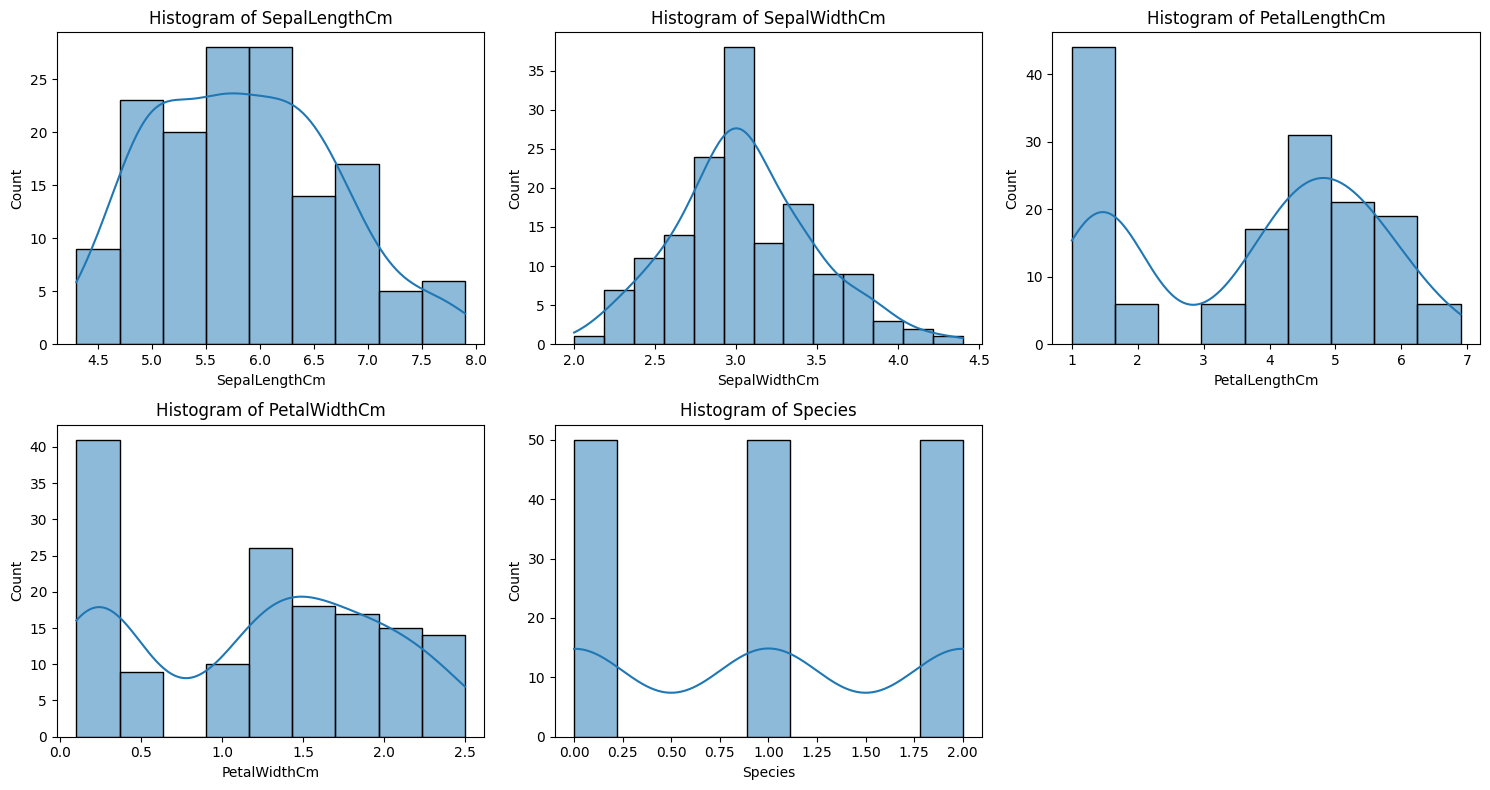

In [11]:
import math
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

# Calculate appropriate rows and columns
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

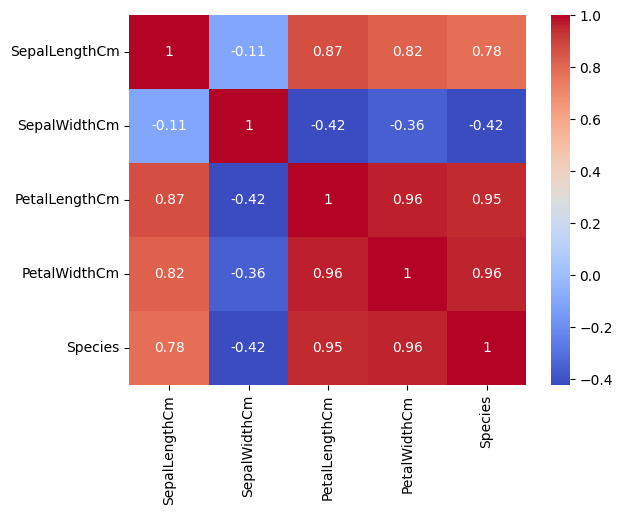

In [13]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [14]:
df = df.drop(['SepalWidthCm'],axis = 1)

In [15]:
df.columns

Index(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

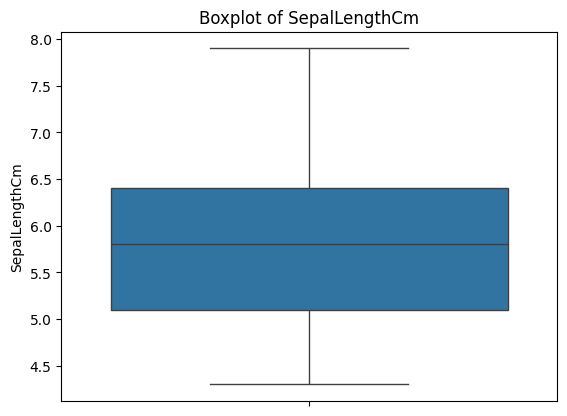

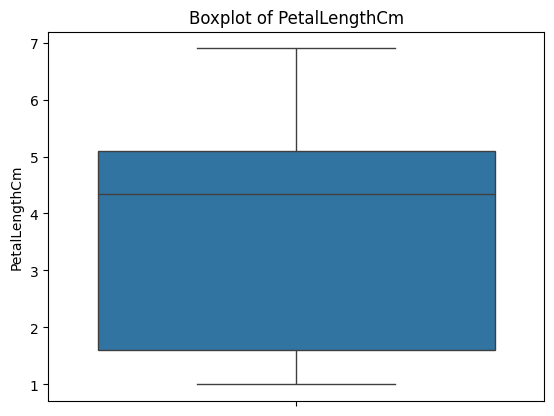

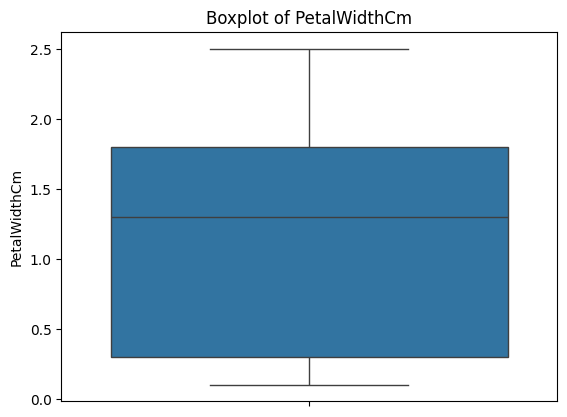

In [19]:

l = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

for i in l:
    plt.figure()  
    sns.boxplot(df[i]) 
    plt.title(f'Boxplot of {i}')
    plt.show()

In [20]:
l = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
for i in l:
    df[i] = df[i]/df[i].max()
df.head()

,SepalLengthCm,PetalLengthCm,PetalWidthCm,Species
0,0.645570,0.202899,0.08,0
1,0.620253,0.202899,0.08,0
2,0.594937,0.188406,0.08,0
3,0.582278,0.217391,0.08,0
4,0.632911,0.202899,0.08,0


<Axes: >

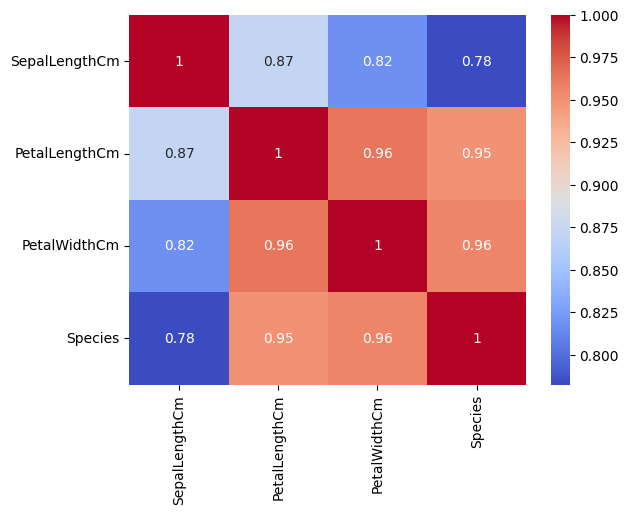

In [21]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X = df.drop(['Species'],axis = 1)
y = df['Species']

In [26]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state = 42)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)  # k = 5
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


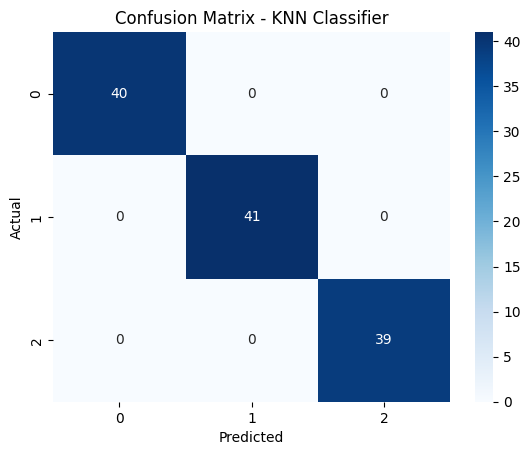

In [42]:
cm = confusion_matrix(y_train, y_pred)

# Display
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

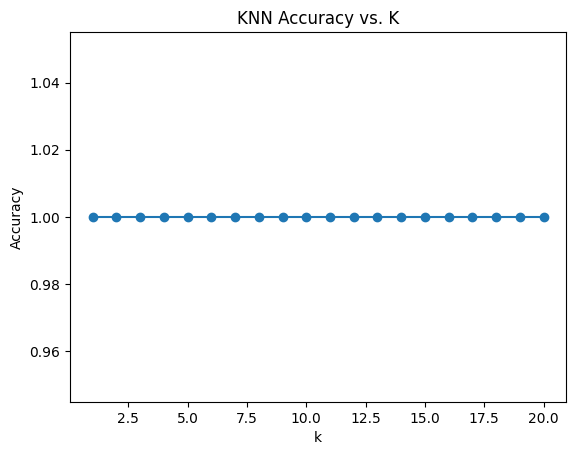

In [43]:
k_vals = range(1, 21)
accuracies = []

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_vals, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K')
plt.show()
